import os and pandas

In [3]:
import os
import pandas as pd

import file (data from https://web.stanford.edu/~hastie/ElemStatLearn/)

In [4]:
os.chdir('C:/Users/Brand/OneDrive/Desktop/PythonFunProjects')
heart = pd.read_csv('SouthAfricaCHD.csv')
heart.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


find descriptive stats

In [12]:
print(heart.describe())
heart.shape

        row.names         sbp     tobacco         ldl   adiposity       typea  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   231.935065  138.326840    3.635649    4.740325   25.406732   53.103896   
std    133.938585   20.496317    4.593024    2.070909    7.780699    9.817534   
min      1.000000  101.000000    0.000000    0.980000    6.740000   13.000000   
25%    116.250000  124.000000    0.052500    3.282500   19.775000   47.000000   
50%    231.500000  134.000000    2.000000    4.340000   26.115000   53.000000   
75%    347.750000  148.000000    5.500000    5.790000   31.227500   60.000000   
max    463.000000  218.000000   31.200000   15.330000   42.490000   78.000000   

          obesity     alcohol         age         chd  
count  462.000000  462.000000  462.000000  462.000000  
mean    26.044113   17.044394   42.816017    0.346320  
std      4.213680   24.481059   14.608956    0.476313  
min     14.700000    0.000000   15.000000    0

(462, 11)

one hot encode famhist

In [13]:
heart = pd.get_dummies(heart)
heart.head()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd,famhist_Absent,famhist_Present
0,1,160,12.00,5.73,23.11,49,25.30,97.20,52,1,0,1
1,2,144,0.01,4.41,28.61,55,28.87,2.06,63,1,1,0
2,3,118,0.08,3.48,32.28,52,29.14,3.81,46,0,0,1
3,4,170,7.50,6.41,38.03,51,31.99,24.26,58,1,0,1
4,5,134,13.60,3.50,27.78,60,25.99,57.34,49,1,0,1


separates the data frame into a y vector of the response and an X matrix of explanatory variables:

In [24]:
import numpy as np
labels = np.array(heart['chd'])
features = heart.drop('chd',axis=1)
features_list = list(features.columns)
features = np.array(features)

seperate training and testing data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [28]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (346, 11)
Training Labels Shape: (346,)
Testing Features Shape: (116, 11)
Testing Labels Shape: (116,)


import skicit learn

In [19]:
import sklearn as sk
from sklearn.linear_model import LogisticRegression

train the model

In [32]:
logreg = LogisticRegression(solver ='liblinear').fit(X_train, y_train)


In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[67  8]
 [21 20]]


In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        75
           1       0.71      0.49      0.58        41

    accuracy                           0.75       116
   macro avg       0.74      0.69      0.70       116
weighted avg       0.74      0.75      0.74       116



In [37]:
round(logreg.score(X_test,y_test), 4)

0.75

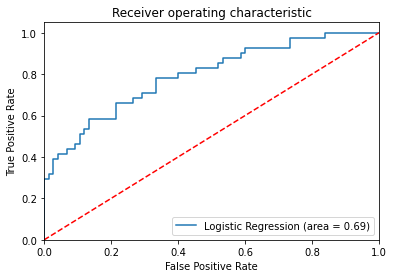

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()